In [2]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [3]:
train_x = pd.read_csv(r".\Dataset\titanic_train.csv")
train_x.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True
1,1,0,3,male,NaN,0,0,7.5500,S,Third,man,True,NaN,Southampton,no,True
2,2,0,3,male,7.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
3,3,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
4,4,1,3,female,29.0,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,yes,False


In [4]:
train_x.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            121
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           486
embark_town      0
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='survived'>

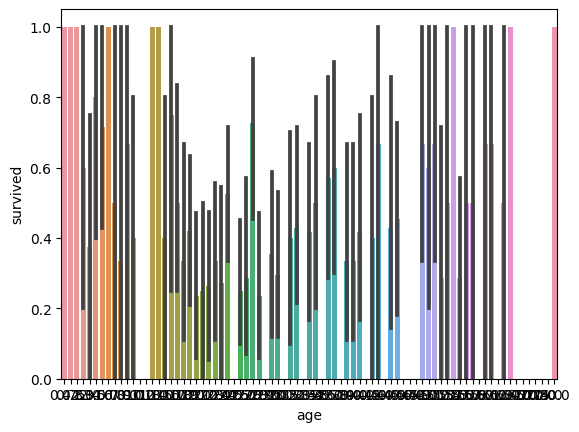

In [5]:
sns.barplot(x = "age",y = "survived",data=train_x)

<AxesSubplot: xlabel='deck', ylabel='survived'>

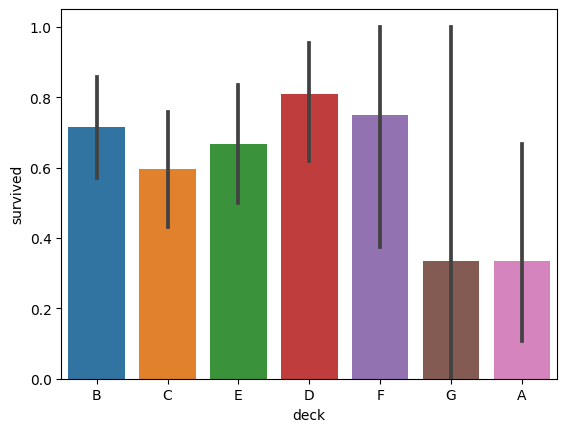

In [6]:
sns.barplot(x="deck",y = "survived", data=train_x)

In [7]:
train_x.drop(['age','deck'],inplace=True,axis=1)

In [8]:
_,train_x['sex']=np.unique(train_x['sex'],return_inverse=True)
_,train_x['embarked'] = np.unique(train_x['embarked'],return_inverse=True)
_,train_x['embark_town'] = np.unique(train_x['embark_town'],return_inverse=True)
_,train_x['class'] = np.unique(train_x['class'],return_inverse=True)
_,train_x['who'] = np.unique(train_x['who'],return_inverse=True)
_,train_x['adult_male'] = np.unique(train_x['adult_male'],return_inverse=True)
_,train_x['alive'] = np.unique(train_x['alive'],return_inverse=True)
_,train_x['alone'] = np.unique(train_x['alone'],return_inverse=True)

train_x.head(5)

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,1,0,0,14.4583,0,2,1,1,0,0,1
1,1,0,3,1,0,0,7.5500,2,2,1,1,2,0,1
2,2,0,3,1,4,1,29.1250,1,2,0,0,1,0,0
3,3,1,1,0,1,0,146.5208,0,0,2,0,0,1,0
4,4,1,3,0,0,2,15.2458,0,2,2,0,0,1,0


In [9]:
train_y = np.ravel(train_x.survived)
train_x.drop(['survived'],inplace=True,axis=1)

In [10]:
train_x.head(10)

,Unnamed: 0,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0,0,14.4583,0,2,1,1,0,0,1
1,1,3,1,0,0,7.5500,2,2,1,1,2,0,1
2,2,3,1,4,1,29.1250,1,2,0,0,1,0,0
3,3,1,0,1,0,146.5208,0,0,2,0,0,1,0
4,4,3,0,0,2,15.2458,0,2,2,0,0,1,0
5,5,1,1,0,0,30.5000,2,0,1,1,2,1,1
6,6,1,0,0,0,153.4625,2,0,2,0,2,1,1
7,7,1,0,0,2,164.8667,2,0,2,0,2,1,0
8,8,1,1,1,0,91.0792,0,0,1,1,0,1,0
9,9,3,0,0,0,7.2292,0,2,2,0,0,1,1


In [11]:
model = Sequential()
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [13]:
model.fit(train_x,train_y,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
623/623 [==============================] - 1s 797us/step - loss: 0.7876 - accuracy: 0.6308
Epoch 2/50
623/623 [==============================] - 0s 704us/step - loss: 0.6505 - accuracy: 0.6308
Epoch 3/50
623/623 [==============================] - 0s 774us/step - loss: 0.6328 - accuracy: 0.6453
Epoch 4/50
623/623 [==============================] - 0s 703us/step - loss: 0.6211 - accuracy: 0.6324
Epoch 5/50
623/623 [==============================] - 0s 716us/step - loss: 0.5839 - accuracy: 0.6709
Epoch 6/50
623/623 [==============================] - 0s 712us/step - loss: 0.5614 - accuracy: 0.6966
Epoch 7/50
623/623 [==============================] - 0s 691us/step - loss: 0.5089 - accuracy: 0.7945
Epoch 8/50
623/623 [==============================] - 0s 728us/step - loss: 0.4655 - accuracy: 0.8331
Epoch 9/50
623/623 [==============================] - 0s 732us/step - loss: 0.4180 - accuracy: 0.8876
Epoch 10/50
623/623 [==============================] - 0s 691us/step - loss: 0.375

In [14]:
test_x = pd.read_csv(r".\Dataset\titanic_test.csv")
test_x.head(20)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,623,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
1,624,0,3,male,28.0,0,0,22.5250,S,Third,man,True,NaN,Southampton,no,True
2,625,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
3,626,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
4,627,0,3,male,NaN,3,1,25.4667,S,Third,man,True,NaN,Southampton,no,False
5,628,0,1,male,NaN,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True
6,629,1,3,female,NaN,1,0,16.1000,S,Third,woman,False,NaN,Southampton,yes,False
7,630,1,3,female,22.0,0,0,7.2500,S,Third,woman,False,NaN,Southampton,yes,True
8,631,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
9,632,0,3,male,18.0,0,0,7.7500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
test_x.drop(['age','deck'],inplace=True,axis=1)
test_x.head(20)

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,623,0,3,female,0,0,14.4583,C,Third,woman,False,Cherbourg,no,True
1,624,0,3,male,0,0,22.5250,S,Third,man,True,Southampton,no,True
2,625,0,3,female,8,2,69.5500,S,Third,woman,False,Southampton,no,False
3,626,0,3,female,8,2,69.5500,S,Third,woman,False,Southampton,no,False
4,627,0,3,male,3,1,25.4667,S,Third,man,True,Southampton,no,False
5,628,0,1,male,0,0,25.9250,S,First,man,True,Southampton,no,True
6,629,1,3,female,1,0,16.1000,S,Third,woman,False,Southampton,yes,False
7,630,1,3,female,0,0,7.2500,S,Third,woman,False,Southampton,yes,True
8,631,1,1,male,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
9,632,0,3,male,0,0,7.7500,S,Third,man,True,Southampton,no,True


In [16]:
#test_x.head(5)
test_x.dropna(inplace=True)
test_x.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
_,test_x['sex']=np.unique(test_x['sex'],return_inverse=True)
_,test_x['embarked'] = np.unique(test_x['embarked'],return_inverse=True)
_,test_x['embark_town'] = np.unique(test_x['embark_town'],return_inverse=True)
_,test_x['class'] = np.unique(test_x['class'],return_inverse=True)
_,test_x['who'] = np.unique(test_x['who'],return_inverse=True)
_,test_x['adult_male'] = np.unique(test_x['adult_male'],return_inverse=True)
_,test_x['alive'] = np.unique(test_x['alive'],return_inverse=True)
_,test_x['alone'] = np.unique(test_x['alone'],return_inverse=True)

In [18]:
test_y = np.ravel(test_x.survived)
test_x.drop(['survived'],inplace=True,axis=1)
test_x.head(10)

,Unnamed: 0,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,623,3,0,0,0,14.4583,0,2,2,0,0,0,1
1,624,3,1,0,0,22.5250,2,2,1,1,2,0,1
2,625,3,0,8,2,69.5500,2,2,2,0,2,0,0
3,626,3,0,8,2,69.5500,2,2,2,0,2,0,0
4,627,3,1,3,1,25.4667,2,2,1,1,2,0,0
5,628,1,1,0,0,25.9250,2,0,1,1,2,0,1
6,629,3,0,1,0,16.1000,2,2,2,0,2,1,0
7,630,3,0,0,0,7.2500,2,2,2,0,2,1,1
8,631,1,1,0,1,512.3292,0,0,1,1,0,1,0
9,632,3,1,0,0,7.7500,2,2,1,1,2,0,1


In [19]:
predictions = model.predict(test_x).flatten()
for i,v in enumerate(predictions) :
    if (v<0.5) :
        predictions[i] = 0
    else :
        predictions[i] = 1

9/9 [==============================] - 0s 750us/step


In [20]:
print(test_y[:] - predictions[:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [21]:
import keras
m = keras.metrics.BinaryAccuracy()
m.update_state(test_y,predictions)
m.result().numpy()

1.0

<AxesSubplot: xlabel='fare', ylabel='survived'>

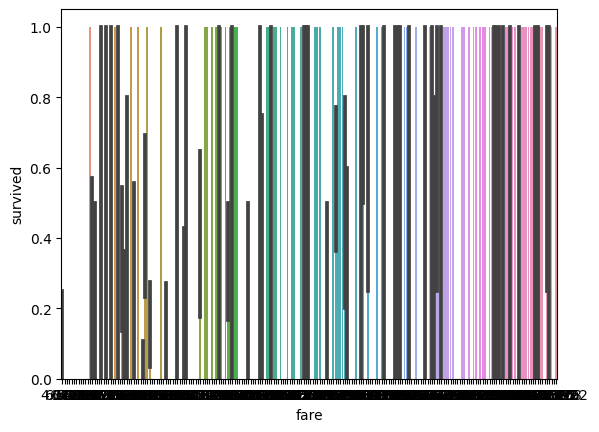

In [122]:
sns.barplot(x = "fare",y = "survived",data=train_x)

<AxesSubplot: xlabel='parch', ylabel='survived'>

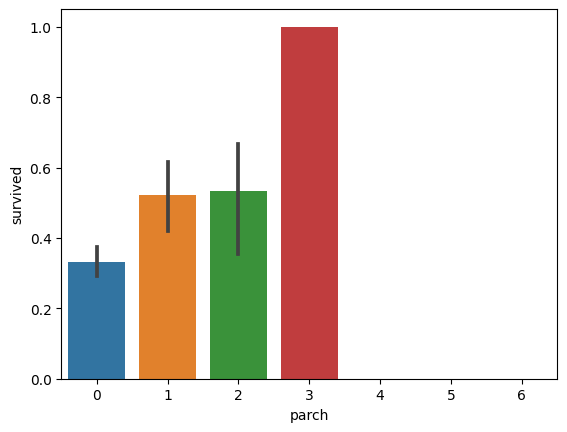

In [123]:
sns.barplot(x = "parch",y = "survived",data=train_x)

<AxesSubplot: xlabel='embarked', ylabel='survived'>

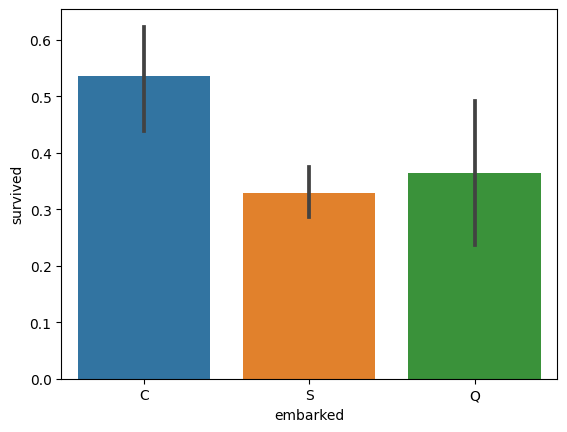

In [124]:
sns.barplot(x = "embarked",y = "survived",data=train_x)

<AxesSubplot: xlabel='class', ylabel='survived'>

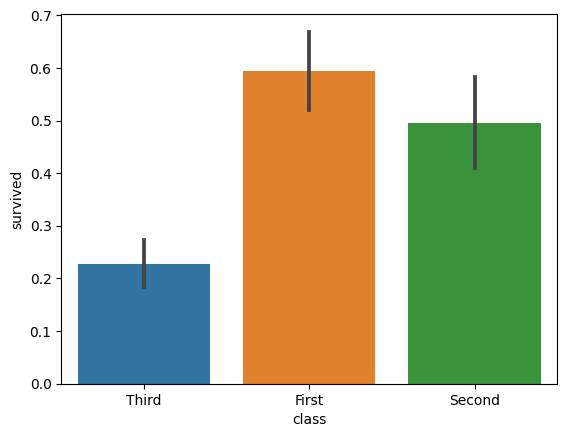

In [125]:
sns.barplot(x = "class",y = "survived",data=train_x)

<AxesSubplot: xlabel='who', ylabel='survived'>

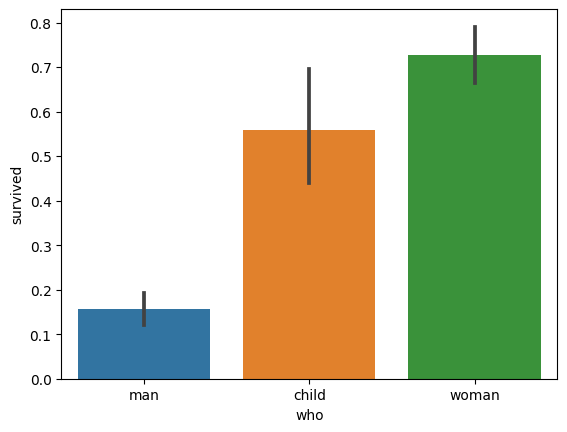

In [126]:
sns.barplot(x = "who",y = "survived",data=train_x)

<AxesSubplot: xlabel='embark_town', ylabel='survived'>

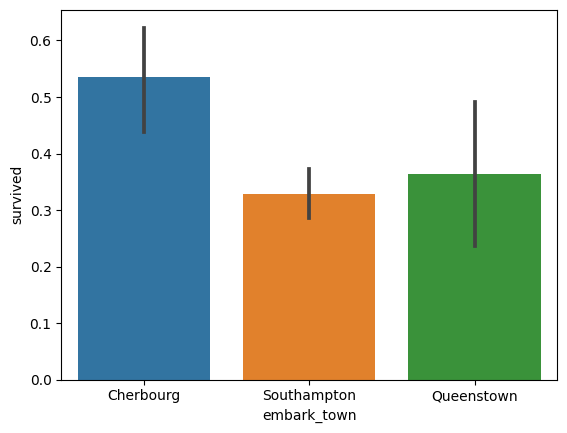

In [128]:
sns.barplot(x = "embark_town",y = "survived",data=train_x)

<AxesSubplot: xlabel='alive', ylabel='survived'>

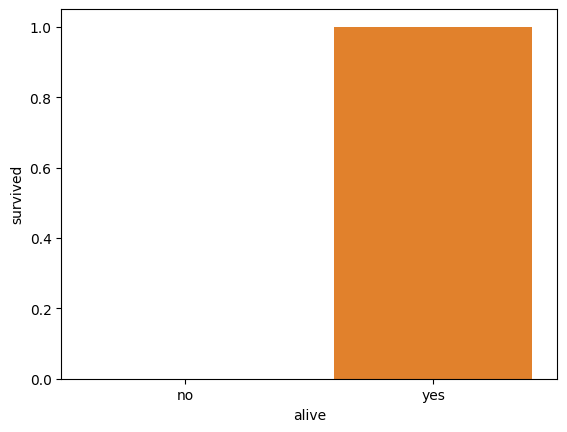

In [129]:
sns.barplot(x = "alive",y = "survived",data=train_x)

<AxesSubplot: xlabel='alone', ylabel='survived'>

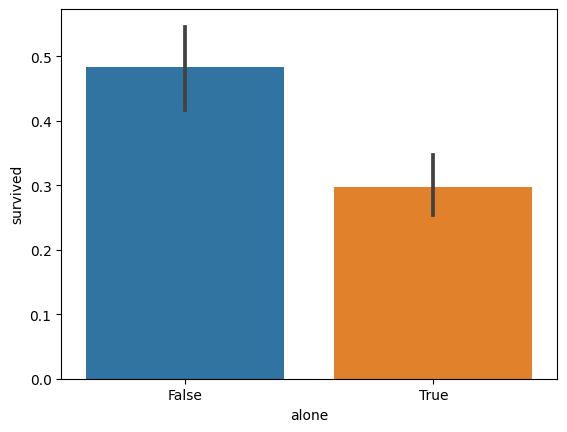

In [130]:
sns.barplot(x = "alone", y = "survived", data=train_x)

<AxesSubplot: xlabel='sibsp', ylabel='survived'>

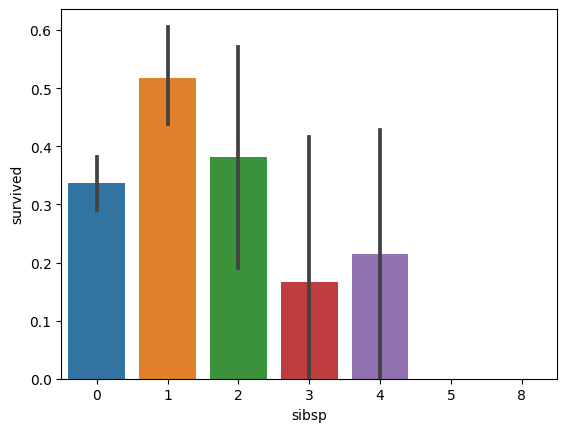

In [131]:
sns.barplot(x = "sibsp", y = "survived", data=train_x)

In [1]:
test_x.drop(['embark_town','embarked','fare'],inplace=True,axis=1)
train_x.drop(['embark_town','embarked','fare'],inplace=True,axis=1)

NameError: name 'test_x' is not defined